Name: Deep Pawar (A20545137)

Professor: Oleksandr Narykov

Institute: Illinois Institute of Technology

CSP 571: Data Preparation and Analysis

Fall 2024 - Assignment 3 : Programming Part 2

In [40]:
#Importing the required libraries
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering

#Fetching the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
print("Metadata : ", heart_disease.metadata)
print("Variable Information : ", heart_disease.variables)

#Cleaning the dataset by handling NaN values
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index]

print(f"\n---------------------------------------------------------------------------------")
print("\nX shape after Cleaning : ", X_cleaned.shape)
print("y shape after Cleaning : ", y_cleaned.shape)
print(f"\n---------------------------------------------------------------------------------")

Metadata :  {'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. S

Q. 1 Implement K-Means clustering manually. Do not use packages with ready-made implementation for this problem.

In [41]:
#Manual implementation of K-Means
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for iteration in range(self.max_iter):
            #Assigning points to the nearest centroid
            self.labels = self._assign_clusters(X)
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        #Computing distances from points to centroids and assign to the nearest one
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)

#Preparing the dataset
X_array = X_cleaned.values

#Applying K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_array)

print("-------------------------------------------------------------------------")
print("Centroids : \n")
print(kmeans.centroids)
print("--------------------------------------------------------------------------")

print("\n--------------------------------------------------------------------------")
print("Cluster Assignments : ")
print(kmeans.labels)
print("--------------------------------------------------------------------------")


-------------------------------------------------------------------------
Centroids : 

[[5.32634409e+01 7.36559140e-01 3.10752688e+00 1.29645161e+02
  2.16548387e+02 1.50537634e-01 8.92473118e-01 1.51763441e+02
  2.84946237e-01 1.00215054e+00 1.59677419e+00 5.86021505e-01
  4.68279570e+00]
 [5.66846847e+01 5.76576577e-01 3.24324324e+00 1.35126126e+02
  2.98963964e+02 1.35135135e-01 1.17117117e+00 1.45972973e+02
  3.96396396e-01 1.14504505e+00 1.61261261e+00 8.28828829e-01
  4.81081081e+00]]
--------------------------------------------------------------------------

--------------------------------------------------------------------------
Cluster Assignments : 
[0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 

Q. 2 Estimate the number of clusters. You can visualize the data using any method discussed in lectures.

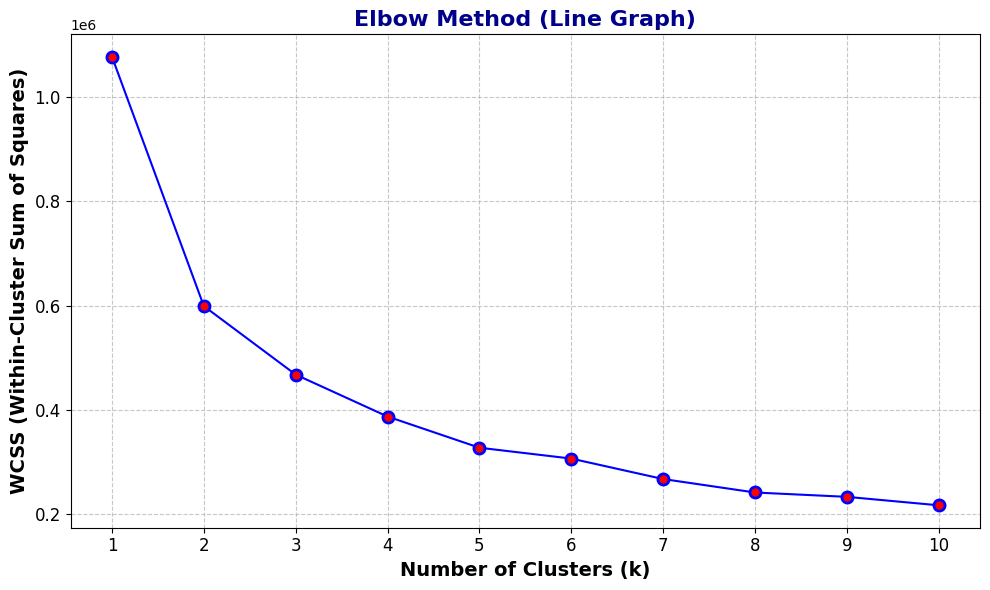

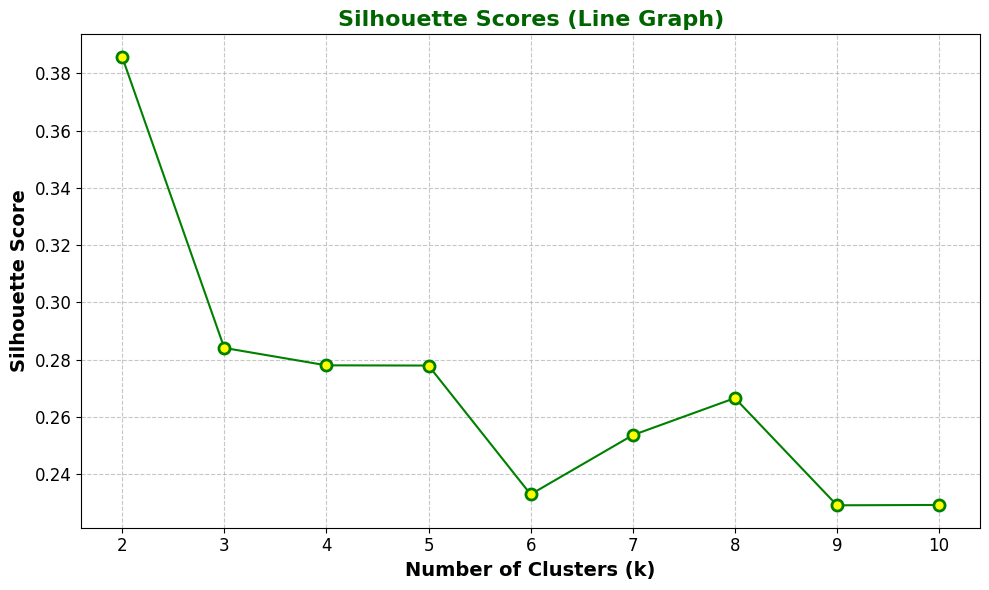

In [42]:
#Function to calculate Within-Cluster Sum of Squares (WCSS)
def cal_wcss(X, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        wcss.append(sum(np.min(np.linalg.norm(X[:, np.newaxis] - kmeans.centroids, axis=2), axis=1) ** 2))
    return wcss

#Function to calculate silhouette scores
def cal_silhouette_scores(X, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels
        silhouette_scores.append(silhouette_score(X, labels))
    return silhouette_scores

import matplotlib.pyplot as plt

#Elbow Method
max_k = 10
wcss = cal_wcss(X_array, max_k)
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', color='b', linestyle='-', markersize=8, markerfacecolor='red', markeredgewidth=2)
plt.title("Elbow Method (Line Graph)", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, max_k + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


print("\n\n")
#Silhouette Analysis
import matplotlib.pyplot as plt
silhouette_scores = cal_silhouette_scores(X_array, max_k)
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='green', linestyle='-', markersize=8, markerfacecolor='yellow', markeredgewidth=2)
plt.title("Silhouette Scores (Line Graph)", fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(2, max_k + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Q. 3 Run your K-Means implementation. Visualize the results.

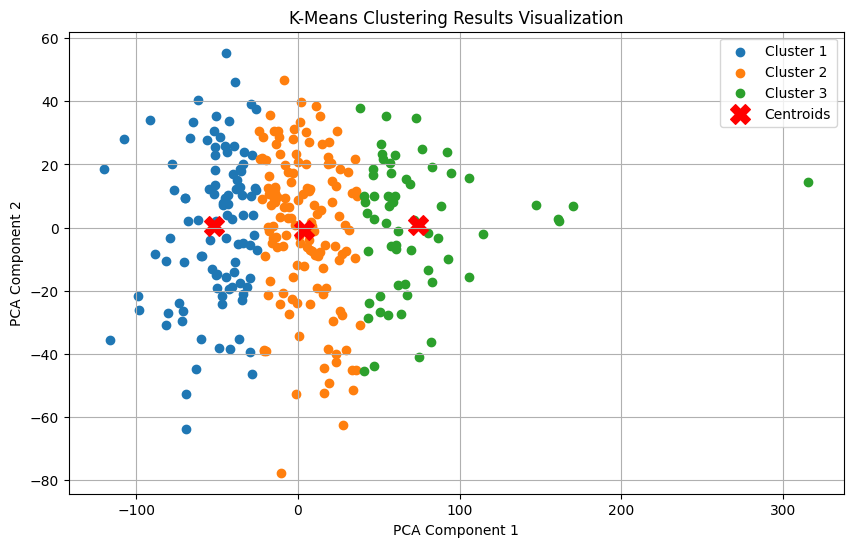

In [43]:
#Fitting K-Means with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_array)

#Using PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_array)

#Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(kmeans.n_clusters):
    cluster_points = X_2d[kmeans.labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}")

#Plotting centroids
centroids_2d = pca.transform(kmeans.centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c="red", marker="X", label="Centroids")

plt.title("K-Means Clustering Results Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

Q. 4 Run spectral clustering. You can use scikit-learn implementation. Visualize the result, compare to K-means.

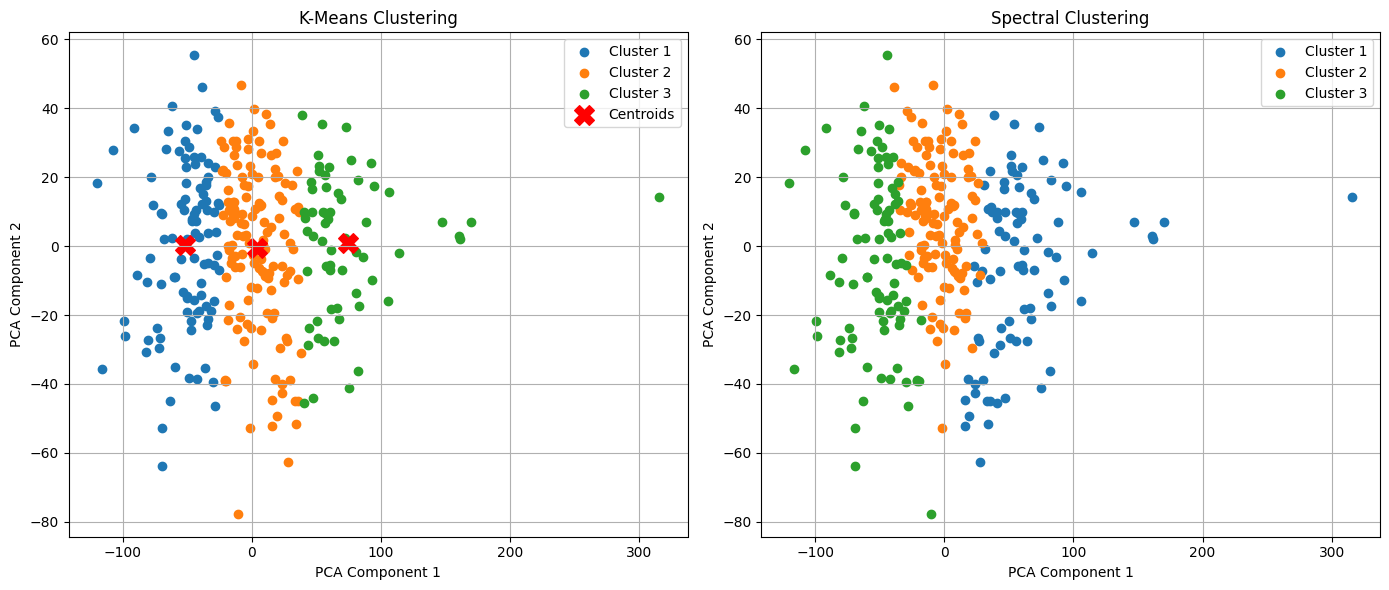

In [44]:
#Implementing Spectral Clustering
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_array)

#Using PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_array)

#Plotting Spectral Clustering
plt.figure(figsize=(14, 6))

#Subplot 1: K-Means
plt.subplot(1, 2, 1)
for cluster in range(kmeans.n_clusters):
    cluster_points = X_2d[kmeans.labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}")
centroids_2d = pca.transform(kmeans.centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c="red", marker="X", label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()

#Subplot 2: Spectral Clustering
plt.subplot(1, 2, 2)
for cluster in range(n_clusters):
    cluster_points = X_2d[spectral_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}")
plt.title("Spectral Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



---


**Comparison Analysis:**

---



The outcomes of the K-Means and Spectral clustering techniques show different methods for data partitioning. The centeroids of the clusters in the K-Means clustering result create comparatively symmetric, spherical groupings (blue, orange, and green). This method relies on the assumption that clusters are compact and equally distant, which makes it effective for linearly separable data but problematic for non-linear boundaries. The existence of characteristic red centroids supports the K-Means methodology even more, as these locations have a significant impact on the clusters' development.

On the other hand, spectral clustering shows its ability to capture uneven or non-linear cluster boundaries. Cluster bounds and forms are more flexible, particularly for points close to overlapping regions, even though the number of clusters and their overall color-coded separations are comparable. When the clusters are not well-separated in Euclidean space, spectral clustering can better reflect the fundamental structure of the data because it is not dependent on centroids like K-Means is. Because of this, spectral clustering is better for datasets with intricate correlations, even if it requires more computing power than K-Means.